<a href="https://colab.research.google.com/github/amroth917/IST652/blob/master/Roth_Allison_FinalProject_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Allison Roth
September 3, 2019
Final Project
IST652


In [0]:
# Set wd in Google CoLab
from google.colab import drive
drive.mount('/content/drive')

import json
import sys
import pandas as pd
import numpy as np
import decimal
from decimal import *
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

In [0]:
#Read in all of the data into seperate files. 
veterans2011 = pd.read_csv("//2011.csv", index_col=0)
veterans2010 = pd.read_csv("//2010.csv", index_col=0)
veterans2009 = pd.read_csv("//2009.csv", index_col=0)
veterans2008 = pd.read_csv("//2008.csv", index_col=0)
veterans2007 = pd.read_csv("//2007.csv", index_col=0)
veterans2006 = pd.read_csv("//2006.csv", index_col=0)
veterans2005 = pd.read_csv("//2005.csv", index_col=0)


In [7]:
#Checking the head of the first dataset
veterans2011.head(5)

,state,vet_pop,overall_pop_18,vet_pop_p,vet_suicides,all_suicides,vet_suicides_p,vet_males,vet_males_p,vet_females,vet_females_p,vet_15_24,vet_18_29,vet_17_34,vet_25_34,vet_30_39,vet_25_44,vet_35_44,vet_40_49,vet_35-54,vet_45_54,vet_50_59,vet_45_64,vet_55_64,vet_60,vet_65,vet_rate,civ_rate
0,Alabama,395753,3662910,0.108043,163,680,0.239706,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.187306,15.824155
1,Alaska,72407,517799,0.139836,27,142,0.190141,24.0,0.888889,3.0,0.111111,4.0,NaN,NaN,5.0,NaN,NaN,3.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,6.0,37.289212,25.819952
2,Arizona,533608,4842927,0.110183,242,1091,0.221815,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.351644,19.701489
3,Arkansas,238790,2221409,0.107495,89,447,0.199105,89.0,1.000000,0.0,0.000000,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,31.0,NaN,NaN,NaN,14.0,NaN,33.0,37.271243,18.056924
4,California,1910994,28292703,0.067544,706,3923,0.179964,679.0,0.961756,27.0,0.038244,20.0,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,250.0,NaN,NaN,356.0,36.944124,12.194055


In [13]:
vetmax = veterans2011.loc[veterans2011['vet_suicides'].idxmax()]
vetmax

# Veteran Suicide Rate vs. Overall Suicide Rate
# Realizing that we need to look at Veteran vs. civilian, not veteran vs. overall
df_overall_rates = pd.DataFrame(
    {'State': veterans2011['state'],
     'veteran_rate': (veterans2011['vet_suicides'] / veterans2011['vet_pop']),
     'overall_rate': (veterans2011['all_suicides'] / veterans2011['overall_pop_18'])
     })
df_overall_rates.head(5)


#Fixed - Overall - Veteran = Civilian. Derp. 
df_rates = pd.DataFrame(
    {'State': veterans2011['state'],
     'veteran_rate': (veterans2011['vet_suicides'] / veterans2011['vet_pop']),
     'civilian_rate': ((veterans2011['all_suicides'] - veterans2011['vet_suicides']) 
                       / (veterans2011['overall_pop_18'] - veterans2011['vet_pop']))
     })
df_rates.head(5)

,State,veteran_rate,civilian_rate
0,Alabama,0.000412,0.000158
1,Alaska,0.000373,0.000258
2,Arizona,0.000454,0.000197
3,Arkansas,0.000373,0.000181
4,California,0.000369,0.000122


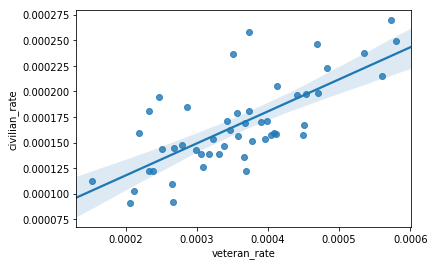

In [51]:
#Veteran Suicide Rate vs. Civilian Suicide Rate comparision
#Positive correlation with some
seaborn.regplot(x=df_rates["veteran_rate"], y=df_rates["civilian_rate"])


In [32]:
#Create df_rates data frame for each dataset
#2005
df_rates_2005 = pd.DataFrame(
    {'State': veterans2005['state'],
     'veteran_rate': (veterans2005['vet_suicides'] / veterans2005['vet_pop']),
     'civilian_rate': ((veterans2005['all_suicides'] - veterans2005['vet_suicides']) 
                       / (veterans2005['overall_pop_18'] - veterans2005['vet_pop']))
     })
df_rates_2005.head(5)

#2006
df_rates_2006 = pd.DataFrame(
    {'State': veterans2006['state'],
     'veteran_rate': (veterans2006['vet_suicides'] / veterans2006['vet_pop']),
     'civilian_rate': ((veterans2006['all_suicides'] - veterans2006['vet_suicides']) 
                       / (veterans2006['overall_pop_18'] - veterans2006['vet_pop']))
     })
df_rates_2006.head(5)

#2007
df_rates_2007 = pd.DataFrame(
    {'State': veterans2007['state'],
     'veteran_rate': (veterans2007['vet_suicides'] / veterans2007['vet_pop']),
     'civilian_rate': ((veterans2007['all_suicides'] - veterans2007['vet_suicides']) 
                       / (veterans2007['overall_pop_18'] - veterans2007['vet_pop']))
     })
df_rates_2007.head(5)


#2008
df_rates_2008 = pd.DataFrame(
    {'State': veterans2008['state'],
     'veteran_rate': (veterans2008['vet_suicides'] / veterans2008['vet_pop']),
     'civilian_rate': ((veterans2008['all_suicides'] - veterans2008['vet_suicides']) 
                       / (veterans2008['overall_pop_18'] - veterans2008['vet_pop']))
     })
df_rates_2008.head(5)

#2009
df_rates_2009 = pd.DataFrame(
    {'State': veterans2009['state'],
     'veteran_rate': (veterans2009['vet_suicides'] / veterans2009['vet_pop']),
     'civilian_rate': ((veterans2009['all_suicides'] - veterans2009['vet_suicides']) 
                       / (veterans2009['overall_pop_18'] - veterans2009['vet_pop']))
     })
df_rates_2009.head(5)


#2010
df_rates_2010 = pd.DataFrame(
    {'State': veterans2010['state'],
     'veteran_rate': (veterans2010['vet_suicides'] / veterans2010['vet_pop']),
     'civilian_rate': ((veterans2010['all_suicides'] - veterans2010['vet_suicides']) 
                       / (veterans2010['overall_pop_18'] - veterans2010['vet_pop']))
     })
df_rates_2010.head(5)

#2011
df_rates_2011 = pd.DataFrame(
    {'State': veterans2011['state'],
     'veteran_rate': (veterans2011['vet_suicides'] / veterans2011['vet_pop']),
     'civilian_rate': ((veterans2011['all_suicides'] - veterans2011['vet_suicides']) 
                       / (veterans2011['overall_pop_18'] - veterans2011['vet_pop']))
     })
df_rates_2011.head(5)


,State,veteran_rate,civilian_rate
0,Alabama,0.000412,0.000158
1,Alaska,0.000373,0.000258
2,Arizona,0.000454,0.000197
3,Arkansas,0.000373,0.000181
4,California,0.000369,0.000122


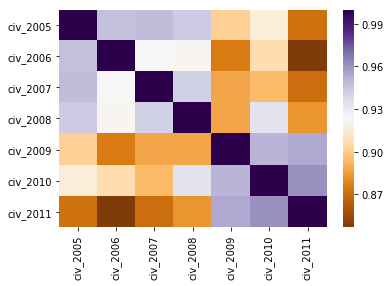

In [57]:
#Create a civilians dataset comparing the suicide rate from 2005-2011 by state
df_civ_rates = pd.DataFrame({
    #'State': df_rates_2011['State'],
    'civ_2005': df_rates_2005['civilian_rate'],
    'civ_2006': df_rates_2006['civilian_rate'],
    'civ_2007': df_rates_2007['civilian_rate'],
    'civ_2008': df_rates_2008['civilian_rate'],
    'civ_2009': df_rates_2009['civilian_rate'],
    'civ_2010': df_rates_2010['civilian_rate'],
    'civ_2011': df_rates_2011['civilian_rate'],
})

df_civ_rates.head(5)


 
# Default heatmap: just a visualization of this square matrix
heat_civ = sns.heatmap(df_civ_rates)

# Calculate correlation between each pair of variable
civ_corr_matrix=df_civ_rates.corr()
 
# plot it
sns.heatmap(civ_corr_matrix, cmap='PuOr')




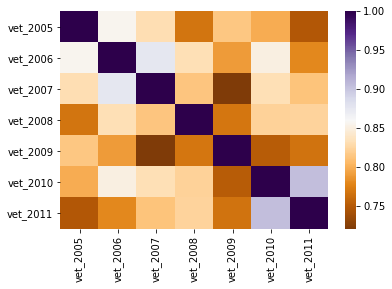

In [58]:
#Create a veterans dataset comparing the suicide rate from 2005-2011 by state
df_vet_rates = pd.DataFrame({
    #'State': df_rates_2011['State'],
    'vet_2005': df_rates_2005['veteran_rate'],
    'vet_2006': df_rates_2006['veteran_rate'],
    'vet_2007': df_rates_2007['veteran_rate'],
    'vet_2008': df_rates_2008['veteran_rate'],
    'vet_2009': df_rates_2009['veteran_rate'],
    'vet_2010': df_rates_2010['veteran_rate'],
    'vet_2011': df_rates_2011['veteran_rate'],
})

df_vet_rates.head(5)


 
# Default heatmap: just a visualization of this square matrix
heat_vet = sns.heatmap(df_vet_rates)

# Calculate correlation between each pair of variable
vet_corr_matrix=df_vet_rates.corr()
 
# plot it
sns.heatmap(vet_corr_matrix, cmap='PuOr')
